In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

In [2]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
import pandas as pd

df_all = pd.read_csv('school_data.csv', encoding='utf-8')
df_all.head()

,연도,학제,학교 세부 유형,고등학교유형,시도,교육지원청,행정구,학교명,본분교,학교상태,설립,남여공학,우편번호,도로명주소,연락처,팩스번호,홈페이지,Unnamed: 17
0,2020,유치원,유치원,NaN,서울,종로구,중부,린덴바움유치원,본교,기존(원)교,사립,NaN,030-25,서울특별시 종로구 통일로12길 51 . 린덴바움유치원 (무악동),02-730-6207,02-730-6208,https://xn--6n1b61jr3bixr.kr/,NaN
1,2020,유치원,유치원,NaN,서울,종로구,중부,배화여자대학교 부속 배화유치원,본교,기존(원)교,사립,NaN,030-39,서울특별시 종로구 필운대로1길 34 (필운동),02-737-1433,02-737-1434,http://www.baewha.ac.kr/mbs/child,NaN
2,2020,유치원,유치원,NaN,서울,종로구,중부,봄샘유치원,본교,기존(원)교,사립,NaN,031-24,서울특별시 종로구 율곡로 264 (종로6가),02-764-3210,02-762-7396,http://bomsaem.kidis.co.kr,NaN
3,2020,유치원,유치원,NaN,서울,종로구,중부,상명사대부속유치원,본교,기존(원)교,사립,NaN,030-15,서울특별시 종로구 홍지문2길 1 (홍지동),02-396-1602,02-394-6577,http://www.smu-kindergarten.com,NaN
4,2020,유치원,유치원,NaN,서울,종로구,중부,서울명신초등학교병설유치원,본교,기존(원)교,공립,NaN,030-93,서울특별시 종로구 낙산길 250 (창신동. 서울명신초등학교),02-744-4633,02-747-0751,http://myungshin.es.kr/,NaN


In [4]:
df_all = df_all[['학제', '학교 세부 유형', '시도', '교육지원청', '도로명주소']]

In [5]:
df_all['시도'].unique()
change_value = {'서울':'서울특별시', '부산':'부산광역시', '대구':'대구광역시', '인천':'인천광역시', 
 '광주':'광주광역시', '대전':'대전광역시', '울산':'울산광역시', '세종':'세종특별자치시', 
 '경기':'경기도', '강원':'강원도', '충북':'충청북도', '충남':'충청남도', 
 '전북':'전라북도', '전남':'전라남도', '경북':'경상북도', '경남':'경상남도', '제주':'제주특별자체도'}
df_all.replace(change_value, inplace=True)

In [6]:
df_all.head()

,학제,학교 세부 유형,시도,교육지원청,도로명주소
0,유치원,유치원,서울특별시,종로구,서울특별시 종로구 통일로12길 51 . 린덴바움유치원 (무악동)
1,유치원,유치원,서울특별시,종로구,서울특별시 종로구 필운대로1길 34 (필운동)
2,유치원,유치원,서울특별시,종로구,서울특별시 종로구 율곡로 264 (종로6가)
3,유치원,유치원,서울특별시,종로구,서울특별시 종로구 홍지문2길 1 (홍지동)
4,유치원,유치원,서울특별시,종로구,서울특별시 종로구 낙산길 250 (창신동. 서울명신초등학교)


In [7]:
df_elem = pd.DataFrame(df_all[df_all['학제'] == '초등학교'])
df_elem = df_elem.reset_index(drop=True)
df_elem['count'] = 1
df_elem.head()

,학제,학교 세부 유형,시도,교육지원청,도로명주소,count
0,초등학교,초등학교,서울특별시,종로구,서울특별시 종로구 홍지문2길 1 . 상명사대부속초등학교 (홍지동. 상명초등학교),1
1,초등학교,초등학교,서울특별시,종로구,서울특별시 종로구 삼일대로 446 (경운동),1
2,초등학교,초등학교,서울특별시,종로구,서울특별시 종로구 대학로 64 서울대학교사범대학부설초등학교(이화동),1
3,초등학교,초등학교,서울특별시,종로구,서울특별시 종로구 통일로12길 23 (무악동. 독립문초등학교),1
4,초등학교,초등학교,서울특별시,종로구,서울특별시 종로구 사직로9길 19 . 서울매동초등학교 (필운동),1


In [8]:
new_df_elem = df_elem.groupby(by=['시도', '교육지원청'], as_index=False).sum()
new_df_elem['시도군구']= new_df_elem.apply(lambda r: r['시도'] + ' ' + r['교육지원청'], axis=1)
new_df_elem = new_df_elem.set_index("시도군구")
new_df_elem

,시도,교육지원청,count
시도군구,,,
강원도 강릉시,강원도,강릉시,38
강원도 고성군,강원도,고성군,15
강원도 동해시,강원도,동해시,14
강원도 삼척시,강원도,삼척시,20
강원도 속초시,강원도,속초시,12
...,...,...,...
충청북도 제천시,충청북도,제천시,24
충청북도 증평군,충청북도,증평군,4
충청북도 진천군,충청북도,진천군,15


In [9]:
df_junior = pd.DataFrame(df_all[df_all['학제'] == '중학교'])
df_high = pd.DataFrame(df_all[df_all['학제'] == '고등학교'])
df_junior = df_junior.reset_index(drop=True)
df_junior['count'] = 1
df_high = df_high.reset_index(drop=True)
df_high['count'] = 1

new_df_junior = df_junior.groupby(by=['시도', '교육지원청'], as_index=False).sum()
new_df_high = df_high.groupby(by=['시도', '교육지원청'], as_index=False).sum()

new_df_junior['시도군구']= new_df_junior.apply(lambda r: r['시도'] + ' ' + r['교육지원청'], axis=1)
new_df_junior = new_df_junior.set_index("시도군구")

new_df_high['시도군구']= new_df_high.apply(lambda r: r['시도'] + ' ' + r['교육지원청'], axis=1)
new_df_high = new_df_high.set_index("시도군구")


In [10]:
new_df_junior.head()

,시도,교육지원청,count
시도군구,,,
강원도 강릉시,강원도,강릉시,12
강원도 고성군,강원도,고성군,4
강원도 동해시,강원도,동해시,7
강원도 삼척시,강원도,삼척시,12
강원도 속초시,강원도,속초시,4


In [11]:
new_df_high.head()

,시도,교육지원청,count
시도군구,,,
강원도 강릉시,강원도,강릉시,11
강원도 고성군,강원도,고성군,4
강원도 동해시,강원도,동해시,6
강원도 삼척시,강원도,삼척시,9
강원도 속초시,강원도,속초시,3


In [12]:
import os
path = os.getcwd()

In [13]:
data_draw_korea = pd.read_csv(path+'/data_draw_korea.csv', index_col=0, encoding='UTF-8', engine='python')

data_draw_korea.head()   #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [14]:
data_draw_korea['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [15]:
data_draw_korea['시도군구']= data_draw_korea.apply(lambda r: r['광역시도'] + ' ' + r['행정구역'], axis=1)

data_draw_korea.head()  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [16]:
data_draw_korea = data_draw_korea.set_index("시도군구")

data_draw_korea  #작업 확인용 출력

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [54]:
data_draw_korea_elem = pd.merge(data_draw_korea, new_df_elem,  how='outer',  left_index=True, right_index=True)

data_draw_korea_elem.dropna(axis=0, inplace=True)
data_draw_korea_elem.to_csv('elem_merged.csv')

In [55]:
data_draw_korea_elem.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도,교육지원청,count
시도군구,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강원도,강릉시,38.0
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,강원도,고성군,15.0
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,강원도,동해시,14.0
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,강원도,삼척시,20.0
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,강원도,속초시,12.0


In [56]:
search_word = ''
sel_data_draw_korea_elem = data_draw_korea_elem.copy()
new_count = data_draw_korea_elem['count'].where(data_draw_korea_elem['광역시도']==search_word, other=0)
sel_data_draw_korea_elem['count'] = new_count
sel_data_draw_korea_elem

,인구수,shortName,x,y,면적,광역시도,행정구역,시도,교육지원청,count
시도군구,,,,,,,,,,
강원도 강릉시,202520.0,강릉,11.0,4.0,1040.07,강원도,강릉시,강원도,강릉시,0.0
강원도 고성군,25589.0,고성(강원),9.0,0.0,664.19,강원도,고성군,강원도,고성군,0.0
강원도 동해시,86747.0,동해,11.0,5.0,180.01,강원도,동해시,강원도,동해시,0.0
강원도 삼척시,63986.0,삼척,11.0,8.0,1185.80,강원도,삼척시,강원도,삼척시,0.0
강원도 속초시,76733.0,속초,9.0,1.0,105.25,강원도,속초시,강원도,속초시,0.0
...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462.0,제천,8.0,10.0,882.47,충청북도,제천시,충청북도,제천시,0.0
충청북도 증평군,34480.0,증평,6.0,11.0,81.84,충청북도,증평군,충청북도,증평군,0.0
충청북도 진천군,62809.0,진천,5.0,11.0,406.08,충청북도,진천군,충청북도,진천군,0.0


In [19]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [41]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
            if len(row['행정구역']) <= 2:
                dispname += row['행정구역'][-1] + "\n" + str(int(row['count']))
        else:
            dispname = row['행정구역'][:-1] + "\n" + str(int(row['count']))

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('./data_result/' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show()      

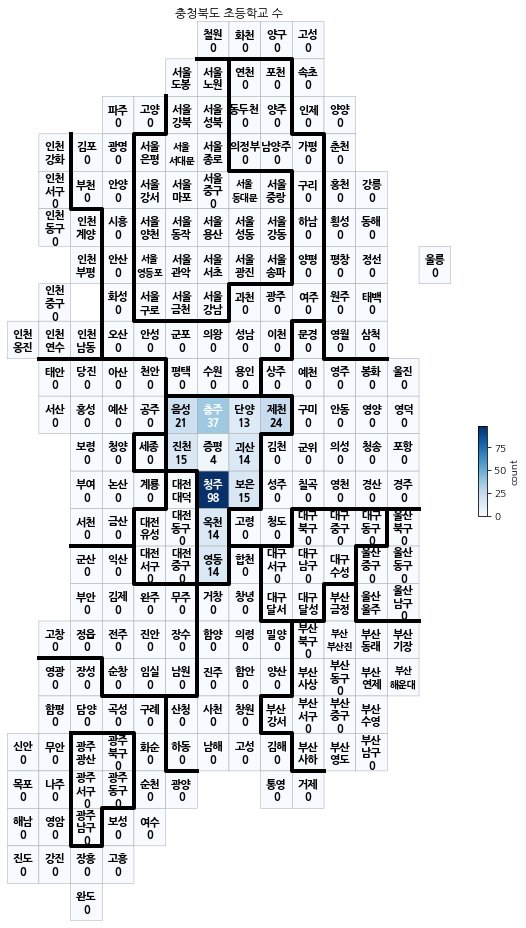

In [42]:
draw_blockMap(sel_data_draw_korea_elem, 'count', '{} 초등학교 수'.format(search_word), 'Blues')

In [53]:
def exam2(a):
    b = list(set(a))
    return b

a = map(int, input().split(' '))
exam2(a)

1 1 2 2 3 3


[1, 2, 3]